**Задание 1**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston["data"]

feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)

target = boston["target"]
y= pd.DataFrame(target,columns=["price"])

Разделим эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируем данные с помощью StandardScaler

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Построим модель TSNE на тренировочный данных с параметрами:

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

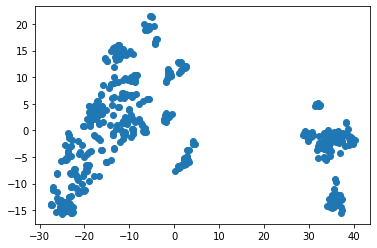

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

**Задание 2**

С помощью KMeans разобьем данные из тренировочного набора на 3 кластера

In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [37]:
train_labels = model.fit_predict( X_train_scaled)
pd.value_counts(train_labels)

2    160
0    141
1    103
dtype: int64

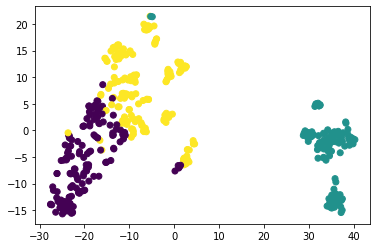

In [40]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

Вычислите средние значения price и CRIM в разных кластерах.

In [44]:
print('Значение класстера 0',y_train[train_labels == 0].mean())
print('Значение класстера 1',y_train[train_labels == 1].mean())
print('Значение класстера 2',y_train[train_labels == 2].mean())

print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))

Значение класстера 0 price    26.836879
dtype: float64
Значение класстера 1 price    16.187379
dtype: float64
Значение класстера 2 price    23.490625
dtype: float64
Кластер 0: 0.0965229078014185
Кластер 1: 12.927381747572817
Кластер 2: 0.7059768750000002


**Задание 3**

In [47]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
test_labels = model.fit_predict( X_test_scaled)
pd.value_counts(test_labels)

2    40
0    33
1    29
dtype: int64

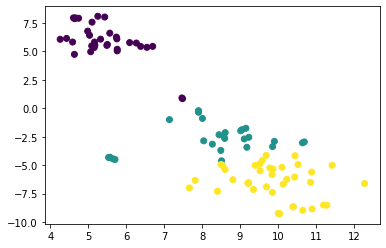

In [48]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)

In [50]:
print('Значение класстера 0',y_test[test_labels == 0].mean())
print('Значение класстера 1',y_test[test_labels == 1].mean())
print('Значение класстера 2',y_test[test_labels == 2].mean())

print('Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Значение класстера 0 price    16.421212
dtype: float64
Значение класстера 1 price    19.817241
dtype: float64
Значение класстера 2 price    26.88
dtype: float64
Кластер 0: 10.707682121212121
Кластер 1: 0.41837034482758617
Кластер 2: 0.12175799999999996
